# 1. Data Merge

In [2]:
import pandas as pd
import numpy as np

df_a = pd.DataFrame({'key': ['a','b','c','d','e'], 'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'], 'num_b': [11,15,35,45,55]})
df_c = pd.DataFrame({'key': ['f','g','h','i','j'], 'num_a': [6,7,8,9,0]})

In [3]:
df_a

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [4]:
df_b

,key,num_b
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [5]:
df_c

,key,num_a
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [6]:
# 위아래로 합치기
pd.concat([df_a, df_b])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [7]:
# 옆으로 합치기
pd.concat([df_a, df_b, df_c], axis=1)

,key,num_a,key,num_b,key,num_a
0,a,1,a,11,f,6
1,b,2,b,15,g,7
2,c,3,d,35,h,8
3,d,4,f,45,i,9
4,e,5,g,55,j,0


In [8]:
# inner merge : key값이 일치하는 row끼리 merge
df_a.merge(df_b, how = 'inner') 
# 혹은
pd.merge(df_a, df_b, how = 'inner')


,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [9]:
# outer merge : 모든 key값을 포함, 중복되지 않는 key값은 NaN으로 표시
df_a.merge(df_b, how = 'outer')
# 혹은
pd.merge(df_a, df_b, how = 'outer')

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [10]:
# left merge : df_a 기준 key값만 사용
# on 매개변수로 컬럼 지정 가능
df_a.merge(df_b, how='left')
# 혹은
pd.merge(left=df_a, right=df_b, how='left')

,key,num_a,num_b
0,a,1,11.0
1,b,2,15.0
2,c,3,NaN
3,d,4,35.0
4,e,5,NaN


In [11]:
# right merge : df_b 기준 컬럼값만 사용
df_a.merge(df_b, how = 'right') 
# 혹은
pd.merge(df_a, df_b, how = 'right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [12]:
# on 매개변수로 컬럼 지정 가능
df_a.merge(df_b, on = 'key' ,how = 'right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [13]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'], 'id': ['q','w','e','r','t'] ,'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'], 'id': ['r','t','z','x','y'] ,'num_b': [11,15,35,45,55]})

In [14]:
df_a

,key,id,num_a
0,a,q,1
1,b,w,2
2,c,e,3
3,d,r,4
4,e,t,5


In [15]:
df_b

,key,id,num_b
0,a,r,11
1,b,t,15
2,d,z,35
3,f,x,45
4,g,y,55


In [16]:
# default : inner, id 컬럼 기준으로 inner merge
df_a.merge(df_b, on='id')

,key_x,id,num_a,key_y,num_b
0,d,r,4,a,11
1,e,t,5,b,15


In [17]:
# df_a의 'id'컬럼을 기준으로 left merge
df_a.merge(df_b, on='id', how='left')

,key_x,id,num_a,key_y,num_b
0,a,q,1,NaN,NaN
1,b,w,2,NaN,NaN
2,c,e,3,NaN,NaN
3,d,r,4,a,11.0
4,e,t,5,b,15.0


In [18]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'],'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'id': ['a','b','d','f','g'],'num_b': [11,15,35,45,55]})

In [19]:
# df_a의 key, df_b의 id를 기준으로 합집합(Full Outer Join) 병합
# (두 데이터프레임의 모든 키를 포함하며, 없는 값은 NaN으로 채움)
df_a.merge(df_b, left_on = 'key', right_on = 'id', how = 'outer')

,key,num_a,id,num_b
0,a,1.0,a,11.0
1,b,2.0,b,15.0
2,c,3.0,NaN,NaN
3,d,4.0,d,35.0
4,e,5.0,NaN,NaN
5,NaN,NaN,f,45.0
6,NaN,NaN,g,55.0


In [20]:
df_a = pd.DataFrame({'key': ['a','b','c','d','e'],'num_a': [1,2,3,4,5]})
df_b = pd.DataFrame({'key': ['a','b','d','f','g'],'num_b': [11,15,35,45,55]})

# Index기준으로 merge 후 이름이 같은 컬럼이 있으면 suffix를 추가해 구분
df_a.join(df_b, lsuffix = '_a', rsuffix = '_b')

,key_a,num_a,key_b,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [21]:
# 기존에 있던 'key'라는 데이터 열(Column)을 인덱스(Index) 자리로 이동
df_a = df_a.set_index('key')
df_b = df_b.set_index('key')

In [22]:
df_a

,num_a
key,
a,1
b,2
c,3
d,4
e,5


In [23]:
# key(index 컬럼)의 UNION 
df_a.join(df_b, how = 'outer')

,num_a,num_b
key,,
a,1.0,11.0
b,2.0,15.0
c,3.0,NaN
d,4.0,35.0
e,5.0,NaN
f,NaN,45.0
g,NaN,55.0


In [24]:
# key(index 컬럼)의 교집합
df_a.join(df_b, how = 'inner')

,num_a,num_b
key,,
a,1,11
b,2,15
d,4,35


# Merge vs Join
- merge : 가장 범용적이고, SQL JOIN의 역할을 한다. 두 데이터프레임에 공통된 열이 있을 떄 주로 사용 기본적으로 inner join
- join : 두 데이터프레임의 인덱스가 잘 정리되어 있을 때 사용. 내부적으로 merge를 호출하되, 인덱스 기준 병합으로 미리 세팅된 단축키 느낌. 기본적으로 left join

In [25]:
salary_1 = pd.read_csv('salary_1.csv')
salary_2 = pd.read_csv('salary_2.csv')

In [26]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [27]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


In [28]:
# pd.concat -> merge할 때 인덱스를 리셋하지 않고 원본 그대로 가져다 붙인다. 
# 때문에 loc[0]으로 접근 시 인덱스가 0인 행을 가져다 주므로 2개가 출력됨.
# 인덱스 중복을 없애려면 ignore_index=True 옵션 사용
salary_df = pd.concat([salary_1, salary_2])
salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [29]:
# 인덱스 중복을 없애는 방법2
salary_df.reset_index(drop = True, inplace = True)

In [30]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [31]:
cpi = pd.read_csv('cpi.csv')

In [32]:
cpi.head()

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [33]:
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [34]:
cpi['Country'].unique()

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [35]:
# Merge할 때 컬럼 내 데이터 일치를 위해 replace
cpi['Country'] = cpi['Country'].replace({'United States' : 'USA', 'United Kingdom' : 'UK'})

In [36]:
salary_df = salary_df.merge(cpi, on = 'Country', how = 'left')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly


In [37]:
# 분석에 관련이 적은 컬럼 삭제
salary_df.drop(['Reference','Previous','Units','Frequency'], axis = 1, inplace = True)

In [38]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [39]:
# Last 컬럼명을 CPI로 변경
salary_df = salary_df.rename({'Last' : 'CPI'}, axis=1)
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


# 2. 개요, 결측치 & 이상치, 집계및 그룹화, 피벗테이블

In [40]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 522.3+ KB


In [41]:
# CPI 컬럼 데이터를 숫자형으로 변환
salary_df['CPI'] = pd.to_numeric(salary_df['CPI'])
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [42]:
# 결측치 확인
salary_df.isna().sum()

Age                    4
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64

In [43]:
# 결측치의 비율
salary_df.isna().mean()

Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPI                    0.000000
dtype: float64

In [44]:
# Age컬럼의 결측치 확인
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [45]:
# 결측치 제거
salary_df = salary_df.dropna()
# describe를 통해 보았던, Years of Experience의 -1은 이상치로 판단하여 제거
salary_df = salary_df[salary_df['Years of Experience'] != -1]
# salary_df의 'Years of Experience 컬럼으로 정렬
salary_df['Years of Experience'].sort_values()

4931     0.0
5104     0.0
5115     0.0
5119     0.0
5143     0.0
        ... 
2396    33.0
2391    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6677, dtype: float64

In [46]:
# 역시 이상치로 판단되는 82 확인
salary_df[salary_df['Years of Experience'] == 82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [47]:
# 근무 가능 연령(18세)을 고려했을 때, 나이에 비해 경력이 불가능하게 긴 이상치(오류) 데이터를 제거
salary_df = salary_df[~(salary_df['Years of Experience'] > salary_df['Age'] - 18)]

🧐 코드 상세 해석
salary_df['Age'] - 18:

"이 사람이 가질 수 있는 최대 경력 연수"를 계산합니다. (현재 나이 - 18살)

salary_df['Years of Experience'] > ...:

"기록된 경력이 최대 가능 경력보다 긴가?"를 검사합니다. (예: 20살인데 경력이 5년인 경우 → 15살 취업? ❌)

~ (물결 표시):

**NOT(반대)**을 의미합니다. 즉, "경력이 말이 안 되는 사람"을 **제외(Remove)**하고, **"정상적인 데이터만 남기겠다"**는 뜻입니다.

In [48]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [49]:
# 경력(Years of Experience)가 0인 경우를 분석 (신입이라고 생각하면 충분히 가능성 있음)
salary_df[salary_df['Years of Experience'] == 0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


In [50]:
# pandas로 Group by
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [51]:
# 남성(male)의 평균 연봉
salary_df[salary_df['Gender'] == "Male"]['Salary'].mean()
# 여성(female)의 평균 연봉
salary_df[salary_df['Gender'] == "Female"]['Salary'].mean()

np.float64(107873.85405585106)

In [52]:
# Gender로 groupby하여 평균값 구하기
salary_df.groupby('Gender').mean(numeric_only=True)

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Gender,,,,,,
Female,32.622008,1.600066,7.417221,107873.854056,0.127992,167.485166
Male,34.425805,1.640207,8.617430,121383.057283,0.155483,166.901888


In [53]:
# Gender로 grouby하여 최대값 구하기
salary_df.groupby('Gender').max()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
Gender,,,,,,,,,
Female,60.0,3,Web Developer,34.0,220000,USA,White,1,307.48
Male,62.0,3,Web Developer,32.0,250000,USA,White,1,307.48


In [54]:
# 특정 컬럼(salary)값만 보고 싶다.
salary_df.groupby('Gender')['Salary'].mean() # .sum(), .median(), .std() 등등

Gender
Female    107873.854056
Male      121383.057283
Name: Salary, dtype: float64

In [55]:
# Gender, Country별 Salary 평균
salary_df.groupby(['Gender','Country'])['Salary'].mean()

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [56]:
# 평균, 합계를 한번에 보고싶을때 : aggregation
salary_df.groupby('Gender')['Salary'].agg(['mean', 'sum'])

,mean,sum
Gender,,
Female,107873.854056,324484553
Male,121383.057283,444990288


In [57]:
# Gender, Counrtry 별 Salary 평균을 새로운 인덱싱으로 저장
salary_df.groupby(['Gender','Country'])['Salary'].mean().reset_index()

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108495.273026
4,Female,USA,104854.691558
5,Male,Australia,120896.764216
6,Male,Canada,123973.921516
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


In [58]:
# 피벗 테이블 생성
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [59]:
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = 'mean')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [60]:
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = np.mean)

/var/folders/47/qvf6ns_n0xbb_s77tyz4nmbm0000gn/T/ipykernel_83222/78362013.py:1: FutureWarning: The provided callable <function mean at 0x1056b21f0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = np.mean)


Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [61]:
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = 'sum')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,65948929,62206902,65773106,65965126,64590490
Male,87166567,91616728,89500964,88260203,88445826


In [62]:
pd.pivot_table(salary_df, index = ['Gender','Race'], columns = 'Country', values = 'Salary', aggfunc = 'sum')

Country                   Australia      Canada       China          UK  \
Gender Race                                                               
Female African American         NaN         NaN         NaN         NaN   
       Asian             22620268.0  20950962.0         NaN  14978857.0   
       Australian        22623208.0         NaN         NaN         NaN   
       Black                    NaN  20851624.0         NaN         NaN   
       Chinese                  NaN         NaN  20858851.0         NaN   
       Hispanic                 NaN         NaN         NaN         NaN   
       Korean                   NaN         NaN  23853851.0         NaN   
       Mixed                    NaN         NaN         NaN  15673240.0   
       Welsh                    NaN         NaN         NaN  17882663.0   
       White             20705453.0  20404316.0  21060404.0  17430366.0   
Male   African American         NaN         NaN         NaN         NaN   
       Asian             31837948.0  31446774.0         NaN  24308468.0   
       Australian        29011770.0         NaN         NaN         NaN   
       Black                    NaN  30659174.0         NaN         NaN   
       Chinese                  NaN         NaN  28164994.0         NaN   
       Hispanic                 NaN         NaN         NaN         NaN   
       Korean                   NaN         NaN  29660738.0         NaN   
       Mixed                    NaN         NaN         NaN  23181267.0   
       Welsh                    NaN         NaN         NaN  19600032.0   
       White             26316849.0  29510780.0  31675232.0  21170436.0   

Country                         USA  
Gender Race                          
Female African American  15448789.0  
       Asian             17533654.0  
       Australian               NaN  
       Black                    NaN  
       Chinese                  NaN  
       Hispanic          14526773.0  
       Korean                   NaN  
       Mixed                    NaN  
       Welsh                    NaN  
       White             17081274.0  
Male   African American  23910271.0  
       Asian             20421501.0  
       Australian               NaN  
       Black                    NaN  
       Chinese                  NaN  
       Hispanic          21025292.0  
       Korean                   NaN  
       Mixed                    NaN  
       Welsh                    NaN  
       White             23088762.0

In [63]:
sales_df = pd.DataFrame({'company': ['a','a','a','a','b','b','b','b'],
             'quarter': ['q1','q2','q3','q4','q1','q2','q3','q4'],
             'sales': [111,222,333,444,555,666,777,888]})
sales_df

,company,quarter,sales
0,a,q1,111
1,a,q2,222
2,a,q3,333
3,a,q4,444
4,b,q1,555
5,b,q2,666
6,b,q3,777
7,b,q4,888


In [64]:
sales_temp = pd.pivot(sales_df, index = 'company', columns = 'quarter', values = 'sales')
sales_temp

quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [65]:
# 피벗 결과로 생긴 컬럼 축의 이름('quarter')을 지워버립니다. ('' 빈 문자열로 변경)
sales_temp.columns = sales_temp.columns.rename('')

In [66]:
new_sales_df = sales_temp.reset_index()

In [67]:
new_sales_df

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [68]:
# 언피벗 과정 : 기준열(id_vars)로 어떤 열을(value_vars)를 세로로 녹여낼(melt)건가? 그렇다면 그 열의 이름(var_name)과 값(value_name)은 무엇인가?
pd.melt(new_sales_df, id_vars = 'company', value_vars = ['q1','q2','q3','q4'], var_name ='quarter' ,value_name = 'sales').sort_values('company')

,company,quarter,sales
0,a,q1,111
2,a,q2,222
4,a,q3,333
6,a,q4,444
1,b,q1,555
3,b,q2,666
5,b,q3,777
7,b,q4,888


# 로그(Log), 원-핫 인코딩 (One-Hot Encoding)

In [69]:
price_df = pd.DataFrame({'level':[1,2,3,4,5,6,7],
             'price': [1,10,100,1000,10000,100000, 1000000]})

price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


<Axes: xlabel='level', ylabel='price'>

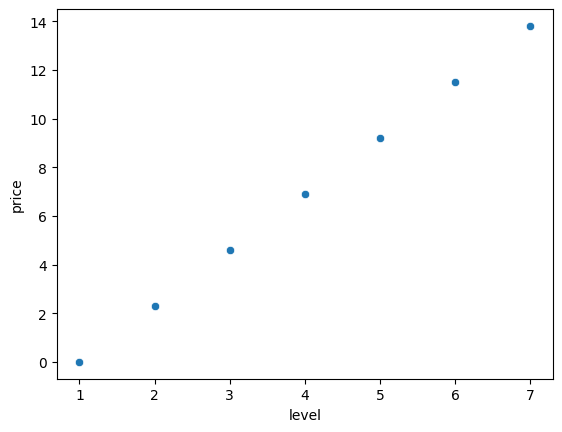

In [70]:
import seaborn as sns
# Log Transformation : 데이터의 변환을 위해 로그 함수를 적용하는 과정. 데이터의 스케일을 조정하거나 정규성을 높이는 데 사용됩니다.
sns.scatterplot(x= price_df['level'], y = np.log(price_df['price']))

In [71]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [72]:
# pandas 데이터프레임 출력 결과 최대 컬럼 수 설정
pd.set_option('display.max_columns', 50)

In [73]:
# one-hot encoding 
# drop-first : N개의 범주 중 N-1개만 사용! -> N개를 모두 사용하면 다중공선성 문제 발생 우려
pd.get_dummies(salary_df, columns = ['Gender','Country','Race','Job Title'], drop_first = True)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Advertising Coordinator,Job Title_Back end Developer,...,Job Title_Sales Operations Manager,Job Title_Sales Representative,Job Title_Scientist,Job Title_Social Media Man,Job Title_Social Media Manager,Job Title_Social Media Specialist,Job Title_Software Architect,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Manager,Job Title_Software Project Manager,Job Title_Strategy Consultant,Job Title_Supply Chain Analyst,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,20.0,200000,0,132.00,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6680,32.0,0,3.0,50000,0,135.30,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6681,30.0,1,4.0,55000,0,100.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6682,46.0,2,14.0,140000,0,100.00,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 스케일링

In [74]:
# 컬럼 별 고유값 개수
salary_df[['Gender','Country','Race','Job Title']].nunique()

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [75]:
salary_df['Job Title'].value_counts().tail(20)

Job Title
Principal Scientist               1
Supply Chain Manager              1
Customer Success Rep              1
Technical Writer                  1
Developer                         1
CEO                               1
Chief Data Officer                1
Digital Content Producer          1
Customer Success Manager          1
Software Project Manager          1
Supply Chain Analyst              1
Office Manager                    1
Principal Engineer                1
Sales Operations Manager          1
Web Designer                      1
Director of Sales                 1
UX Researcher                     1
Director of Product Management    1
Consultant                        1
Human Resources Director          1
Name: count, dtype: int64

In [76]:
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [77]:
job = pd.read_csv('job.csv')
salary_df = salary_df.merge(job, on = 'Job Title', how = 'left')
salary_df.drop('Job Title', axis = 1, inplace = True)
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [78]:
salary_df['Jobs'].value_counts()

Jobs
Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                        

In [79]:
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [80]:
salary_df = pd.get_dummies(salary_df, columns = ['Gender','Country','Race','Jobs'], drop_first = True)

In [81]:
salary_df['Age'].mean()

np.float64(33.61282589151933)

In [82]:
salary_df['Age'].std()

np.float64(7.594369005848066)

In [83]:
# Z-score in 'Age' column
(salary_df['Age'] - salary_df['Age'].mean()) / salary_df['Age'].std()

0      -0.212371
1      -0.739077
2       1.499423
3       0.314335
4       2.421159
          ...   
6669    2.026129
6670   -0.212371
6671   -0.475724
6672    1.631100
6673   -1.002430
Name: Age, Length: 6674, dtype: float64

In [84]:
# 제3사분위수(75%) 계산
salary_df['Age'].quantile(0.75)

np.float64(38.0)

In [85]:
# 중앙값과 IQR을 사용한 스케일링 (Robust)
(salary_df['Age'] - salary_df['Age'].quantile(0.5)) / (salary_df['Age'].quantile(0.75) - salary_df['Age'].quantile(0.25))

0       0.0
1      -0.4
2       1.3
3       0.4
4       2.0
       ... 
6669    1.7
6670    0.0
6671   -0.2
6672    1.4
6673   -0.6
Name: Age, Length: 6674, dtype: float64

In [86]:
salary_df['Age'].max()

np.float64(62.0)

In [87]:
# 최대-최소값을 이용한 스케일링 (Min-Max)
(salary_df['Age'] - salary_df['Age'].min()) / (salary_df['Age'].max() - salary_df['Age'].min())

0       0.268293
1       0.170732
2       0.585366
3       0.365854
4       0.756098
          ...   
6669    0.682927
6670    0.268293
6671    0.219512
6672    0.609756
6673    0.121951
Name: Age, Length: 6674, dtype: float64

In [88]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [90]:
# 객체 생성
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [91]:
# StandardScaler

ss.fit(salary_df) # fit

## transform with columns
ss_df = pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

# RobustScaler

rs.fit(salary_df) # fit

## transform with columns
rs_df = pd.DataFrame(rs.transform(salary_df), columns = salary_df.columns)

# MinMaxScaler

mm.fit(salary_df) # fit

## transform with columns
mm_df = pd.DataFrame(mm.transform(salary_df), columns = salary_df.columns)

In [92]:
ss_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,3.705792,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,1.981278,1.782999,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [93]:
rs_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
mm_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
ss_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,...,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,0.000000,1.022057e-16,1.022057e-16,-2.571113e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,-2.235750e-17,-4.152108e-17,3.460090e-17,3.832715e-17,-6.387858e-18,4.870742e-17,5.323215e-18,-3.327009e-17,3.193929e-17,4.471501e-17,-4.258572e-18,2.129286e-18,-1.064643e-18,-2.981000e-17,-1.064643e-18,...,-2.129286e-18,-2.129286e-18,-2.555143e-17,-1.064643e-18,-3.406858e-17,2.555143e-17,-8.517144e-18,6.813715e-17,3.406858e-17,-1.064643e-18,-1.703429e-17,-1.064643e-17,0.000000,3.406858e-17,-1.064643e-17,3.406858e-17,-3.406858e-17,-2.129286e-18,-1.064643e-18,4.258572e-18,-2.129286e-18,-2.129286e-18,-4.258572e-18,-2.129286e-18,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339541,-2.176344e+00,-4.086407e-01,-9.170975e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-2.999700e-02,-1.731358e-02,-1.224164e-02,-5.880584e-02,-1.224164e-02,...,-1.224164e-02,-1.224164e-02,-1.500728e-01,-1.224164e-02,-1.101465e-01,-2.262502e-01,-2.448878e-02,-2.229376e-01,-7.364320e-02,-1.224164e-02,-9.281258e-02,-2.448878e-02,-0.173486,-2.698479e-01,-2.448878e-02,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-0.841970,-8.575989e-01,-4.086407e-01,-4.801554e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-2.999700e-02,-1.731358e-02,-1.224164e-02,-5.880584e-02,-1.224164e-02,...,-1.224164e-02,-1.224164e-02,-1.500728e-01,-1.224164e-02,-1.101465e-01,-2.262502e-01,-2.448878e-02,-2.229376e-01,-7.364320e-02,-1.22

In [97]:
# 모든 열의 평균값은 거의 0에 가까움
# 표준편차는 모두 1이거나 거의 가까움 
# -> 정규화를 진행했기 때문.
round(3.406858e-17, 10)

0.0

In [98]:
# 중앙값(50%)을 0, 제3사분위값(75%)을 1로 변환된 것을 확인가능
rs_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119610,0.003271,0.143093,1.193437,-0.450704,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.000899,0.00030,0.000150,0.003446,0.000150,...,0.000150,0.000150,0.022026,0.000150,0.011987,0.048696,0.000599,0.047348,0.005394,0.000150,0.008541,0.000599,0.029218,0.067875,0.000599,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.759437,0.880460,0.669972,0.586881,0.350193,2.743136,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.029972,0.01731,0.012241,0.058608,0.012241,...,0.012241,0.012241,0.146778,0.012241,0.108834,0.215249,0.024476,0.212398,0.073251,0.012241,0.092027,0.024476,0.168429,0.251551,0.024476,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.322097,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.123596,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.876404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000

In [99]:
# 최대,최소값을 1,0로 변환된 것을 확인가능 
mm_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237544,0.460422,0.143093,0.323717,0.549296,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.000899,0.00030,0.000150,0.003446,0.000150,...,0.000150,0.000150,0.022026,0.000150,0.011987,0.048696,0.000599,0.047348,0.005394,0.000150,0.008541,0.000599,0.029218,0.067875,0.000599,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.185229,0.293487,0.177346,0.211574,0.350193,0.353006,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.029972,0.01731,0.012241,0.058608,0.012241,...,0.012241,0.012241,0.146778,0.012241,0.108834,0.215249,0.024476,0.212398,0.073251,0.012241,0.092027,0.024476,0.168429,0.251551,0.024476,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.170137,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.282919,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [100]:
# 주성분 분석(PCA)
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(salary_df)

salary_df

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,3,20.0,200000,0,132.00,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6670,32.0,0,3.0,50000,0,135.30,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6671,30.0,1,4.0,55000,0,100.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6672,46.0,2,14.0,140000,0,100.00,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
pd.DataFrame(pca.transform(salary_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,-25294.401449,-35.927515,0.421192,-1.180524,-0.539384,-0.180507,0.681375,0.184226,1.002788,-0.353779,0.100003,-0.181280,0.058951,-0.103092,-0.004072,0.025935,-0.087458,-0.009350,0.011387,-0.025845,-0.027084,0.002889,0.131434,0.031248,-0.021312,...,0.000475,0.001467,0.000614,0.001724,2.595045e-13,5.290650e-16,-2.800109e-14,-8.930794e-14,-0.000072,-0.000072,-0.000299,0.000542,-0.000085,0.000409,-0.000202,0.000790,0.001080,0.000709,0.000634,0.001002,-0.001531,0.001945,0.001446,0.000183,8.905987e-07
1,-50294.407066,138.806380,-0.333187,-0.224362,0.958083,-0.241859,-0.241186,-0.383320,-0.143392,-0.010515,-0.266753,0.168347,-0.250288,-0.028152,-0.013862,-0.429984,0.133174,0.810935,-0.153297,-0.253917,0.751095,-0.122647,0.168979,-0.005033,0.150582,...,0.001596,0.000444,0.000147,-0.002323,5.103821e-13,-6.770899e-15,-4.688785e-14,-1.635060e-13,0.000193,0.000278,0.000430,-0.000401,0.000133,0.000083,-0.000014,0.000600,-0.001072,0.000971,-0.000299,-0.000647,-0.000817,0.001051,0.000654,-0.001228,1.167173e-06
2,34705.599441,-7.432077,8.552416,-1.092177,0.704549,-0.298237,0.195463,1.195063,-0.003916,-0.012052,0.096195,0.414340,0.255642,-0.061686,-0.007109,-0.017978,0.080600,0.017476,0.002989,-0.061125,0.173380,-0.017722,-0.292285,-0.339236,0.051028,...,-0.339049,0.293021,0.340097,0.162646,-4.410607e-13,-8.344773e-14,-1.867366e-14,7.361528e-15,0.000252,-0.001121,0.001244,-0.000506,0.000084,-0.000469,-0.000356,0.003923,0.000044,0.001753,-0.001553,0.000607,0.000873,0.003067,-0.001219,0.027325,-4.787029e-05
3,-55294.405818,138.644191,9.233644,-1.028194,-0.255635,-0.216322,-0.515753,-0.434514,-0.106573,0.012223,-0.274566,0.192541,-0.501353,-0.078578,0.002643,0.401955,0.500041,0.072505,-0.006183,0.237894,0.749731,0.008218,0.232856,-0.007099,0.089223,...,0.001673,0.000003,0.000009,-0.001903,5.731989e-13,-2.142859e-15,-5.598503e-14,-1.857174e-13,0.000062,0.000125,0.000449,-0.000088,0.000021,0.000065,-0.000088,0.000358,-0.000766,0.000658,0.000070,0.000106,-0.000526,0.000420,-0.000550,-0.001362,7.529997e-07
4,84705.595635,142.853086,10.357471,-1.719041,-0.880828,0.481965,-0.161034,-0.207667,-0.462547,-0.233319,0.435806,-0.300143,-0.269897,-0.098484,-0.030532,-0.116544,0.072956,0.018747,-0.014937,-0.034864,-0.236817,0.075935,-0.013262,-0.028159,-0.082385,...,-0.001376,-0.005821,-0.000325,-0.201687,-2.404617e-01,3.226531e-01,-1.364442e-02,-2.332389e-02,-0.153265,-0.004026,0.016499,-0.018619,0.141723,-0.015134,-0.233500,0.025686,-0.089761,0.219891,-0.278292,0.095314,0.458073,0.280014,0.498182,0.079949,1.275956e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,84705.600608,-32.627228,7.654235,-0.031748,0.428731,0.296013,-0.823992,-0.544413,0.631546,-0.487361,-0.550570,-0.599993,0.289079,-0.123239,0.018158,-0.030443,0.181065,-0.086645,-0.713379,0.110357,0.041772,-0.056601,-0.160873,0.024408,0.016186,...,0.000040,-0.001429,0.000502,-0.001874,-8.840449e-13,1.579015e-14,1.013006e-13,3.057693e-13,0.000100,0.000451,0.000367,0.000166,-0.000303,0.000532,0.000285,-0.001327,-0.001390,-0.001391,0.001188,0.000953,0.000819,-0.000123,-0.000980,-0.001808,-8.371537e-07
6670,-65294.401335,-33.835290,4.861691,-1.979699,-1.185291,0.089906,-0.103539,0.063824,-0.378510,-0.455633,-0.276001,0.190401,-0.467971,0.928311,-0.011521,0.445314,0.362428,-0.008605,0.020795,0.336310,0.007259,-0.120811,-0.093474,-0.078545,-0.002042,...,-0.001481,0.001922,-0.001334,0.000644,6.926893e-13,9.882184e-15,-6.636767e-14,-2.164754e-13,0.000071,-0.000290,-0.000099,-0.001056,0.000290,0.001020,-0.001146,-0.000667,0.001149,-0.000034,0.000448,-0.000200,-0.000130,0.000018,-0.000445,0.000067,2.864485e-07
6671,-60294.400430,-68.984421,3.005404,-0.147405,0.009182,-0.480902,-0.366391,-0.660713,-0.52

In [102]:
pca = PCA(2) # 주성분 2개

pd.DataFrame(pca.fit_transform(salary_df), columns = ['PC1', 'PC2'])

,PC1,PC2
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [103]:
# PCA로 차원이 축소된 데이터의 주성분이 원본 데이터의 분산을 얼마나 잘 설명하는가를 비율로 표현
(pca.explained_variance_ratio_).sum()

np.float64(0.9999999848414098)

In [104]:
# 컬럼 간 상관계수
salary_df.corr()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
Age,1.000000,0.597131,0.938002,0.729071,0.333341,-0.027109,0.118189,0.005074,0.017223,0.011160,-0.025624,-0.018577,0.002827,0.012583,-0.004786,-0.025260,-0.001645,0.002743,0.006790,0.020116,-0.009004,0.008863,-0.005824,0.005692,0.021581,...,-0.005824,0.010296,0.038169,0.007072,-0.080869,-0.042186,0.017373,0.259979,0.012106,0.000624,-0.121778,0.004473,0.041298,-0.166507,0.017373,-0.044524,0.002858,0.026417,0.015133,0.006666,-0.010660,0.013423,0.013380,-0.007436,-0.068369
Education Level,0.597131,1.000000,0.612996,0.645249,0.274061,-0.016302,0.022686,0.001361,0.002490,0.022404,-0.016487,-0.004196,-0.019098,0.020257,-0.023535,-0.008992,0.010575,0.009533,0.015505,0.007718,-0.021197,-0.012234,-0.008650,-0.012513,0.005254,...,-0.008650,-0.008650,-0.086333,0.005254,-0.060630,-0.030196,-0.010351,0.184639,-0.045068,-0.008650,-0.171006,-0.017305,0.270508,-0.337510,0.038327,-0.036747,-0.034312,-0.008650,-0.008650,-0.014985,-0.008650,-0.002401,0.029911,-0.008650,-0.062120
Years of Experience,0.938002,0.612996,1.000000,0.811046,0.317443,-0.022393,0.099047,0.005579,0.013838,0.013330,-0.021354,-0.013785,-0.000897,0.013363,-0.009377,-0.023151,0.002661,0.003243,0.001373,0.019896,-0.016965,0.002652,-0.010307,-0.014528,0.022179,...,-0.010307,0.014057,0.021039,0.003905,-0.090000,-0.009336,0.011874,0.228036,0.011280,0.001875,-0.124326,-0.001326,0.100130,-0.202751,0.015936,-0.041389,0.000430,0.028270,0.020148,-0.001441,-0.012337,0.011267,0.005838,-0.010307,-0.102502
Salary,0.729071,0.645249,0.811046,1.000000,0.223751,-0.021693,0.127268,0.010821,0.008797,0.006277,-0.022481,-0.000178,-0.005398,0.015605,-0.020796,-0.020821,0.009268,0.004504,-0.011862,0.021137,-0.032352,-0.021404,-0.016293,-0.039523,0.012680,...,-0.012816,-0.011657,-0.041583,-0.005863,-0.111276,0.110118,-0.011149,0.213982,-0.006414,-0.003545,-0.158675,-0.025059,0.137077,-0.301000,0.003341,-0.058547,0.047428,0.003408,-0.002386,-0.018187,-0.016293,-0.010750,-0.003480,-0.016293,-0.147764
Senior,0.333341,0.274061,0.317443,0.223751,1.000000,-0.020193,0.039063,0.012860,0.014788,-0.001407,-0.020095,-0.014561,-0.016480,0.009976,-0.003624,-0.004145,-0.004055,-0.001556,-0.005208,0.028862,0.016297,-0.007075,-0.005002,0.048985,-0.005002,...,-0.005002,-0.005002,-0.032171,-0.005002,-0.025351,-0.078539,0.059927,0.543544,0.016642,0.029957,-0.037927,-0.010007,0.056142,-0.103466,0.042444,-0.021251,-0.059025,-0.005002,-0.005002,0.011521,-0.005002,0.017647,0.030574,-0.005002,-0.057370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jobs_Technical Writer,-0.010660,-0.008650,-0.012337,-0.016293,-0.005002,-0.005326,0.011089,-0.006081,-0.006124,-0.006107,-0.006179,0.021827,-0.003299,-0.003232,-0.003256,-0.002756,-0.003319,-0.002810,-0.002805,-0.007871,-0.000367,-0.000212,-0.000150,-0.000720,-0.000150,...,-0.000150,-0.000150,-0.001837,-0.000150,-0.001348,-0.002770,-0.000300,-0.002729,-0.000902,-0.000150,-0.001136,-0.000300,-0.002124,-0.003303,-0.000300,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,1.000000,-0.000212,-0.000367,-0.000150,-0.0